Code for implementing the pretrained ResNet Model

Contributors-

1. Vaibhav Chhabra

2. Vishwanath Hurakadli

In [1]:
import numpy as np
import os

In [6]:
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import torchvision.models as models
from torchvision.io import read_image
from torch.utils.data import DataLoader
from sklearn.utils import shuffle
import torch.optim as optim
from torchsummary import summary

In [35]:
net = models.resnet18(pretrained=True)

In [36]:
num_ftrs = net.fc.in_features
net.fc = nn.Linear(num_ftrs, 10)
summary(net, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

In [37]:
Transform = transforms.Compose([transforms.ToTensor(), transforms.Resize(224)])
train_set = datasets.ImageFolder('dataset/train', transform=Transform)
test_set = datasets.ImageFolder('dataset/test', transform=Transform)

In [38]:
train_set = shuffle(train_set)
test_set = shuffle(test_set)

In [39]:
words = ['Begin', 'Choose', 'Connection', 'Navigation', 'Next', 'Previous', 'Start', 'Stop', 'Hello', 'Web']

Label: Start


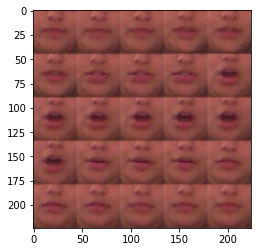

In [40]:
plt.imshow(train_set[0][0].permute(1, 2, 0))
print("Label:", words[train_set[0][1]])

In [41]:
num_epochs = 25
num_classes = 10
lr = 0.001
rho = 0.9
b_size = 50

ce = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(net.parameters(), lr = lr, alpha = rho)

In [42]:
trainDataLoader = DataLoader(train_set, shuffle = True, batch_size = b_size)
testDataLoader = DataLoader(test_set, batch_size = b_size)

In [46]:
def Train(trainDataLoader, testDataLoader, net, num_epochs, b_size, num_classes, optimizer):
  epoch_loss = np.zeros(num_epochs)
  epoch_loss_test = np.zeros(num_epochs)

  train_acc = np.zeros(num_epochs)
  test_acc = np.zeros(num_epochs)

  for I in range(num_epochs):

    print("Epoch[",I+1,"] started...")

    right_count = 0
    right_count_test = 0

    total_count = len(trainDataLoader)*b_size
    total_count_test = len(testDataLoader)*b_size

    for batch_idx, (data, targets) in enumerate(trainDataLoader):
      
      print("Processing Batch[",batch_idx+1,"]")

      # Forward
      output = net(data)
      loss = ce(output, targets)
      epoch_loss[I] += float(loss)
      
      # Backward
      optimizer.zero_grad()
      loss.backward()
      
      # Optimizing step
      optimizer.step()

      # calculating training accuracy
      for a in range(b_size):
        idx = torch.argmax(output[a])
        if(targets[a] == idx):
          right_count += 1

    # Testing
    print("Now Testing...")
    for batch_idx, (data, targets) in enumerate(testDataLoader):
      
      pred = net(data)
      loss = ce(pred, targets)
      epoch_loss_test[I] += float(loss)

       # calculating testing accuracy
      for a in range(b_size):
        idx = torch.argmax(pred[a])
        if(targets[a] == idx):
          right_count_test += 1
    
    train_acc[I] = right_count/total_count*100
    test_acc[I] = right_count_test/total_count_test*100
    print('Epoch[', I+1, '/', num_epochs,'] :', 'Train Accuracy =', train_acc[I], '  , Test Accuracy =', test_acc[I])
    
  fig = plt.figure(figsize=(16, 6))

  # Plotting Training and Testing Error
  fig.add_subplot(1, 2, 1)

  plt.plot(epoch_loss, label='Train')
  plt.plot(epoch_loss_test, label='Test')
  plt.xlabel('Epochs')
  plt.ylabel('Error')
  plt.legend()

  # Plotting Training and Testing Accuracy
  fig.add_subplot(1, 2, 2)

  plt.plot(train_acc, label='Train')
  plt.plot(test_acc, label='Test')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

Epoch[ 1 ] started...
Processing Batch[ 1 ]
Processing Batch[ 2 ]
Processing Batch[ 3 ]
Processing Batch[ 4 ]
Processing Batch[ 5 ]
Processing Batch[ 6 ]
Processing Batch[ 7 ]
Processing Batch[ 8 ]
Processing Batch[ 9 ]
Processing Batch[ 10 ]
Processing Batch[ 11 ]
Processing Batch[ 12 ]
Processing Batch[ 13 ]
Processing Batch[ 14 ]
Processing Batch[ 15 ]
Processing Batch[ 16 ]
Processing Batch[ 17 ]
Processing Batch[ 18 ]
Processing Batch[ 19 ]
Processing Batch[ 20 ]
Processing Batch[ 21 ]
Now Testing...
Epoch[ 1 / 25 ] : Train Accuracy = 14.095238095238095   , Test Accuracy = 16.444444444444446
Epoch[ 2 ] started...
Processing Batch[ 1 ]
Processing Batch[ 2 ]
Processing Batch[ 3 ]
Processing Batch[ 4 ]
Processing Batch[ 5 ]
Processing Batch[ 6 ]
Processing Batch[ 7 ]
Processing Batch[ 8 ]
Processing Batch[ 9 ]
Processing Batch[ 10 ]
Processing Batch[ 11 ]
Processing Batch[ 12 ]
Processing Batch[ 13 ]
Processing Batch[ 14 ]
Processing Batch[ 15 ]
Processing Batch[ 16 ]
Processing Batc

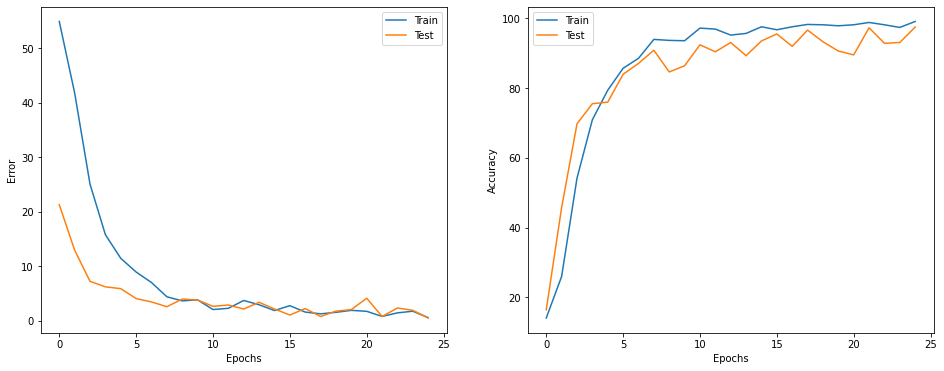

In [47]:
Train(trainDataLoader, testDataLoader, net, num_epochs, b_size, num_classes, optimizer)